# Dropout

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
def plot_history(history, figsize=(6,12), marker='o'):
       
    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]
    
    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)
    
    
    # For each metric
    for i, metric_name in enumerate(metrics):
        # Get the axis for the current metric
        if len(metrics)==1:
            ax = axes
        else:
            ax = axes[i]
    
        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch
    
        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)
    
        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)
    
        # Final subplot adjustments 
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()
    return fig, axes

In [3]:
# Load data from your path
df = pd.read_csv('Data/nba.csv', index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
# Check for null values
df.isna().sum().sum()

11

In [5]:
df.shape

(1340, 20)

In [6]:
# Drop missings
df.dropna(inplace = True)

In [8]:
# Define X and y
target = 'TARGET_5Yrs'
X = df.drop(columns = target)
y = df[target]
# Train test_Val split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size = .3, random_state=42)

In [9]:
# Split the X_test_val into test and val data 
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size = .5, random_state=42)

In [10]:
# Scale our data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [11]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [12]:
# Without dropout
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
              metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision'),
                        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit the model
history = model.fit(X_train, y_train,
                    validation_data= (X_val, y_val), 
                    epochs=50)

Epoch 1/50
30/30 [==============================] - 2s 13ms/step - loss: 0.6171 - accuracy: 0.6280 - recall: 0.6241 - precision: 0.7316 - val_loss: 0.5959 - val_accuracy: 0.6734 - val_recall: 0.6552 - val_precision: 0.7525
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.6527 - recall: 0.7080 - precision: 0.7219 - val_loss: 0.5836 - val_accuracy: 0.6482 - val_recall: 0.7069 - val_precision: 0.6949
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5875 - accuracy: 0.6688 - recall: 0.7587 - precision: 0.7185 - val_loss: 0.5837 - val_accuracy: 0.6482 - val_recall: 0.7414 - val_precision: 0.6825
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.6806 - recall: 0.7657 - precision: 0.7288 - val_loss: 0.5766 - val_accuracy: 0.6583 - val_recall: 0.7586 - val_precision: 0.6875
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.6925 - recall: 0.8

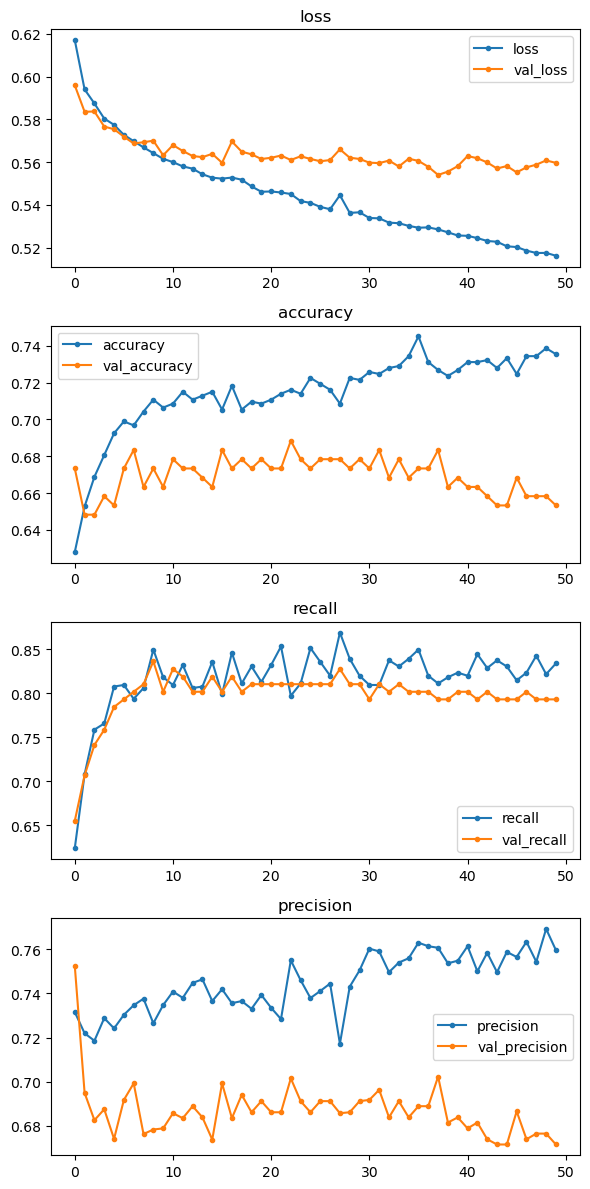

In [14]:
# Visualize the results
plot_history(history, marker='.');

In [15]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test, y_test, return_dict=True)
result

7/7 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7050 - recall: 0.7754 - precision: 0.7926


{'loss': 0.5371506214141846,
 'accuracy': 0.7049999833106995,
 'recall': 0.7753623127937317,
 'precision': 0.7925925850868225}

In [16]:
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=50)

Epoch 1/50
30/30 [==============================] - 1s 12ms/step - loss: 0.8146 - accuracy: 0.4753 - recall: 0.5612 - precision: 0.5753 - val_loss: 0.7199 - val_accuracy: 0.4673 - val_recall: 0.6207 - val_precision: 0.5373
Epoch 2/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5344 - recall: 0.7255 - precision: 0.6006 - val_loss: 0.6315 - val_accuracy: 0.5829 - val_recall: 0.8621 - val_precision: 0.5988
Epoch 3/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6571 - accuracy: 0.5763 - recall: 0.8217 - precision: 0.6168 - val_loss: 0.6094 - val_accuracy: 0.6030 - val_recall: 0.8966 - val_precision: 0.6082
Epoch 4/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.5935 - recall: 0.8794 - precision: 0.6195 - val_loss: 0.5956 - val_accuracy: 0.5930 - val_recall: 0.9052 - val_precision: 0.6000
Epoch 5/50
30/30 [==============================] - 0s 3ms/step - loss: 0.6348 - accuracy: 0.6065 - recall: 0.9

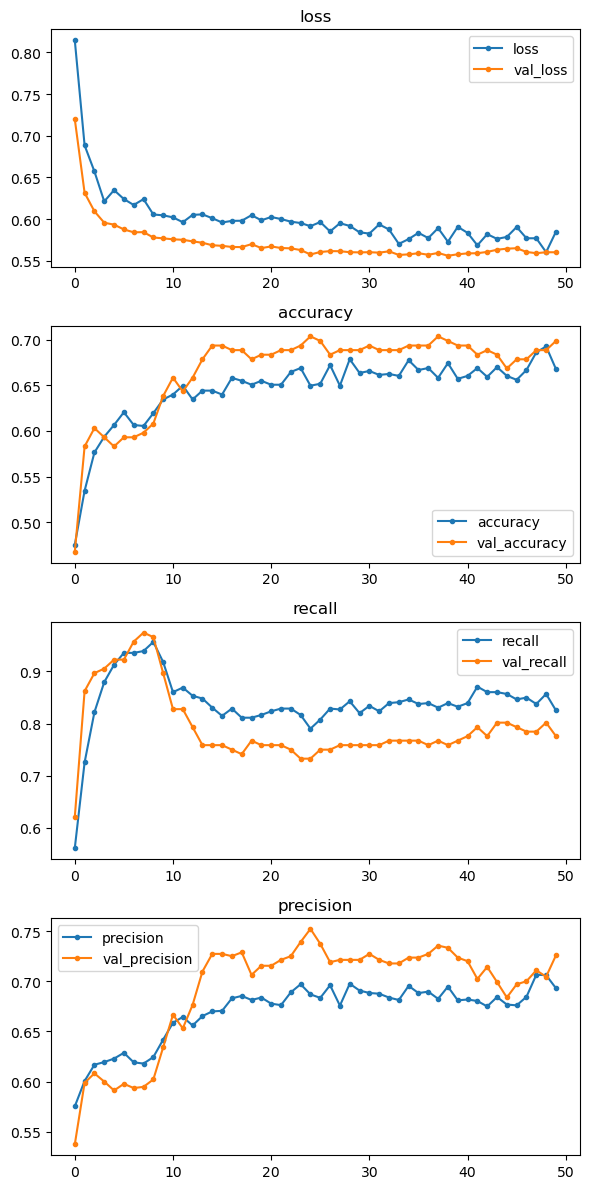

In [17]:
# Visualize the results
plot_history(history, marker='.');

In [18]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test, y_test, return_dict=True)
result

7/7 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7150 - recall: 0.7754 - precision: 0.8045


{'loss': 0.5544350743293762,
 'accuracy': 0.7149999737739563,
 'recall': 0.7753623127937317,
 'precision': 0.8045112490653992}

# Early Stopping

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
# With early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])

In [21]:
# Instantiate EarlyStopping
early_stopping = EarlyStopping(patience = 5)

In [22]:
# Fit the model with the early stopping callback
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
30/30 [==============================] - 1s 9ms/step - loss: 0.6845 - accuracy: 0.5634 - recall: 0.4126 - precision: 0.7712 - val_loss: 0.6074 - val_accuracy: 0.6633 - val_recall: 0.6897 - val_precision: 0.7207
Epoch 2/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.6656 - recall: 0.7150 - precision: 0.7343 - val_loss: 0.5823 - val_accuracy: 0.6884 - val_recall: 0.7845 - val_precision: 0.7109
Epoch 3/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.6828 - recall: 0.7378 - precision: 0.7443 - val_loss: 0.5638 - val_accuracy: 0.7085 - val_recall: 0.7672 - val_precision: 0.7417
Epoch 4/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.6892 - recall: 0.7587 - precision: 0.7419 - val_loss: 0.5579 - val_accuracy: 0.6935 - val_recall: 0.7759 - val_precision: 0.7200
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5856 - accuracy: 0.6957 - recall:

In [23]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test, y_test, return_dict=True)
result

7/7 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7500 - recall: 0.8116 - precision: 0.8235


{'loss': 0.5407871007919312,
 'accuracy': 0.75,
 'recall': 0.8115941882133484,
 'precision': 0.8235294222831726}

In [24]:
# With dropout and early stopping
# Sequential model
model = Sequential()
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])

In [25]:
# Instantiate early stopping
early_stopping = EarlyStopping(patience = 5)

In [26]:
# Fit the model with the early stopping callback
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
30/30 [==============================] - 1s 10ms/step - loss: 0.7444 - accuracy: 0.5140 - recall: 0.4161 - precision: 0.6685 - val_loss: 0.6624 - val_accuracy: 0.5850 - val_recall: 0.4855 - val_precision: 0.8481
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5656 - recall: 0.6154 - precision: 0.6567 - val_loss: 0.6162 - val_accuracy: 0.6650 - val_recall: 0.6667 - val_precision: 0.8142
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6502 - accuracy: 0.6215 - recall: 0.7255 - precision: 0.6803 - val_loss: 0.5969 - val_accuracy: 0.7100 - val_recall: 0.7536 - val_precision: 0.8125
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6290 - recall: 0.7552 - precision: 0.6782 - val_loss: 0.5850 - val_accuracy: 0.7000 - val_recall: 0.7681 - val_precision: 0.7910
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.6656 - recall

In [27]:
# Evaluate neural network with built in evaluation
result = model.evaluate(X_test, y_test, return_dict=True)
result

7/7 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7300 - recall: 0.8261 - precision: 0.7917


{'loss': 0.5351994037628174,
 'accuracy': 0.7300000190734863,
 'recall': 0.8260869383811951,
 'precision': 0.7916666865348816}

# Keras Tuner

In [28]:
# Build and Compile Model within a function
def build_model():
    # Instantiate Model 
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10, 
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile Model
    model.compile(loss = 'bce', optimizer = 'adam',
             metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])
    return model

In [29]:
# Call our build function to build model
basic_model = build_model()

# Get model summary
basic_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 19)                380       
                                                                 
 dense_13 (Dense)            (None, 10)                200       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras_tuner import HyperParameters as hp
import keras_tuner as kt

In [31]:
# Build and Compile Model within a function to try optimizers
def build_model(hp):
    # Instantiate Model 
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    model.add(Dense(10, 
                activation = 'relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile Model
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model

In [32]:
# Make a folder to store results of hyperparameter tuning
import os
folder = 'KerasTuner/'
os.makedirs(folder, exist_ok=True)

In [33]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=5,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [35]:
# Run the tuner
epochs = 100
tuner.search(X_train, y_train,  epochs=epochs,
             validation_data = (X_val, y_val), callbacks = [early_stop])

Trial 3 Complete [00h 00m 01s]
val_accuracy: 0.6130653023719788

Best val_accuracy So Far: 0.6683416962623596
Total elapsed time: 00h 00m 05s
INFO:tensorflow:Oracle triggered exit


In [36]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'optimizer': 'rmsprop',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [37]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Evaluate neural network with built in evaluation
result = best_model.evaluate(X_test, y_test, return_dict=True)
result

7/7 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.5900 - recall: 0.5942 - precision: 0.7593


{'loss': 0.6478108763694763,
 'accuracy': 0.5899999737739563,
 'recall': 0.5942028760910034,
 'precision': 0.7592592835426331}

In [39]:
# Build and Compile Model within a function to try different optimizers, units, and dropout values
def build_model(hp):
    # Instantiate Model 
    model = Sequential()
    # First hidden layer
    model.add(Dense(19, # How many neurons you have in your first hidden layer
                input_dim =input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
    # Try different values for units
    model.add(Dense(units=hp.Int('units', min_value=10, max_value=50, step=5), activation='relu'))
    # Try different values for dropout rate
    model.add(Dropout(hp.Float(name="dropout_value", min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation = 'sigmoid'))
    
    # Compile Model
    # Try different optimizers
    model.compile(optimizer=hp.Choice('optimizer',['rmsprop','nadam','adam']),
                  loss='bce',
                  metrics=['accuracy',
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.Precision(name='precision')])
    return model

In [40]:
# Define tuner object
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     directory=folder,
                     overwrite = True,
                     seed = 42,
                     project_name='Rookie_tuning')

In [41]:
# Run the tuner
epochs = 100
tuner.search(X_train, y_train,  epochs=epochs,
             validation_data = (X_val, y_val), callbacks = [early_stop])

Trial 172 Complete [00h 00m 02s]
val_accuracy: 0.7236180901527405

Best val_accuracy So Far: 0.7738693356513977
Total elapsed time: 00h 04m 59s
INFO:tensorflow:Oracle triggered exit


In [42]:
# Obtain best hyperparameter values
best_hps=tuner.get_best_hyperparameters()[0]
best_hps.values

{'units': 10,
 'dropout_value': 0.2,
 'optimizer': 'rmsprop',
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

In [43]:
# Obtain best model
best_model = tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                380       
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Evaluate neural network with tuned optimizer, units, and dropout
result = best_model.evaluate(X_test, y_test, return_dict=True)
result

7/7 [==============================] - 0s 3ms/step - loss: 0.5904 - accuracy: 0.6800 - recall: 0.6667 - precision: 0.8364


{'loss': 0.5904127359390259,
 'accuracy': 0.6800000071525574,
 'recall': 0.6666666865348816,
 'precision': 0.8363636136054993}

In [45]:
# Inspect results in more detail
tuner.results_summary(5)

Results summary
Results in KerasTuner/Rookie_tuning
Showing 5 best trials
Objective(name="val_accuracy", direction="max")

Trial 0004 summary
Hyperparameters:
units: 10
dropout_value: 0.2
optimizer: rmsprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.7738693356513977

Trial 0098 summary
Hyperparameters:
units: 10
dropout_value: 0.2
optimizer: rmsprop
tuner/epochs: 4
tuner/initial_epoch: 2
tuner/bracket: 4
tuner/round: 1
tuner/trial_id: 0004
Score: 0.7688442468643188

Trial 0082 summary
Hyperparameters:
units: 35
dropout_value: 0.1
optimizer: rmsprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 4
tuner/round: 0
Score: 0.7587939500808716

Trial 0131 summary
Hyperparameters:
units: 10
dropout_value: 0.2
optimizer: rmsprop
tuner/epochs: 12
tuner/initial_epoch: 4
tuner/bracket: 4
tuner/round: 2
tuner/trial_id: 0098
Score: 0.7587939500808716

Trial 0142 summary
Hyperparameters:
units: 10
dropout_value: 0.2
optimizer: rmsprop
tuner/epochs: 34
tuner